## Install Dependecies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load the dataSets

In [5]:
product_data = pd.read_csv('product_asin.csv')
review_data = pd.read_csv('reviews_supplements.csv')


## Data Overview

In [6]:
# Display the first few rows of the product data
print("Product Data Sample:")
print(product_data.head())

# Display the first few rows of the review data
print("Review Data Sample:")
print(review_data.head())

# General information about the dataframes
print("Product Data Info:")
product_data.info()
print("Review Data Info:")
review_data.info()


Product Data Sample:
    X                                              title parent_asin  \
0   1                     Allegra Allergy 45ct + 15 Free  B00JENH5OI   
1   2  InvoSpa Shiatsu Back Shoulder and Neck Massage...  B0C4L5Y711   
2   4  Kal 100 Mcg Selenium Yeast Free Tablets, 100 C...  B00020HX5S   
3   5  Rocky Mountain Oils Cinnamon Bark Essential Oi...  B07K363N3S   
4  12  Prevail Super Absorbent Underpads, Prevail Sup...  B00ACMDOOA   

              categories                      cat1  \
0  ['Health & Household'             'Health Care'   
1  ['Health & Household'   'Wellness & Relaxation'   
2  ['Health & Household'                 'Vitamins   
3  ['Health & Household'             'Health Care'   
4  ['Health & Household'             'Health Care'   

                             cat2                               cat3  \
0   'Over-the-Counter Medication'                           'Allergy   
1     'Massage Tools & Equipment'               'Electric Massagers'   
2    

# Handling Missing Values

In [9]:
# Check for missing values
print("Missing Values in Product Data:")
print(product_data.isnull().sum())

print("Missing Values in Review Data:")
print(review_data.isnull().sum())

# Handling Missing Values in Product Data
product_data['title'].fillna('Title Not Available', inplace=True)
product_data['cat2'].fillna('Not Specified', inplace=True)
product_data['cat3'].fillna('Not Specified', inplace=True)
product_data['cat4'].fillna('Not Specified', inplace=True)
product_data['cat5'].fillna('Not Specified', inplace=True)
product_data['cat6'].fillna('Not Specified', inplace=True)

# Handling Missing Values in Review Data
review_data['title'].fillna('Review Title Missing', inplace=True)
review_data['text'].fillna('Review Text Missing', inplace=True)




Missing Values in Product Data:
X              0
title          0
parent_asin    0
categories     0
cat1           0
cat2           0
cat3           0
cat4           0
cat5           0
cat6           0
dtype: int64
Missing Values in Review Data:
rating               0
title                0
text                 0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
date                 0
time                 0
dtype: int64


### Check if all missing values are handled

In [10]:
print("Product Data Missing Values After Correction:")
print(product_data.isnull().sum())
print("Review Data Missing Values After Correction:")
print(review_data.isnull().sum())

Product Data Missing Values After Correction:
X              0
title          0
parent_asin    0
categories     0
cat1           0
cat2           0
cat3           0
cat4           0
cat5           0
cat6           0
dtype: int64
Review Data Missing Values After Correction:
rating               0
title                0
text                 0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
date                 0
time                 0
dtype: int64


# Exploratory Data Analysis (EDA)

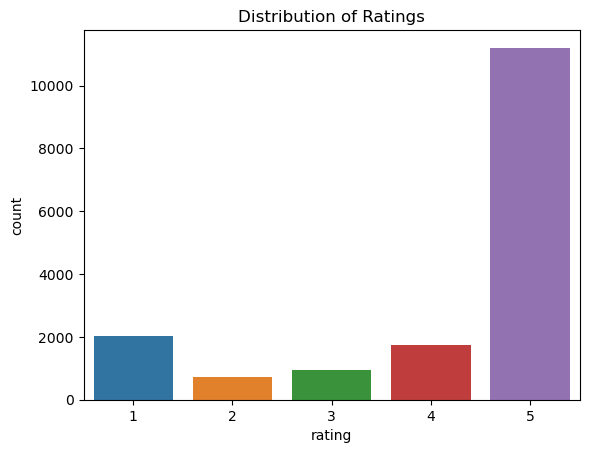

parent_asin
B07JGSQ8RK    5.0
B01G60U2JG    5.0
B01CALU2QI    5.0
B07GBBLYFM    5.0
B07G3H7944    5.0
Name: rating, dtype: float64


In [11]:
# Visualizing the distribution of ratings in the review data
sns.countplot(x='rating', data=review_data)
plt.title('Distribution of Ratings')
plt.show()

# Analyzing the average rating by product
average_rating = review_data.groupby('parent_asin')['rating'].mean().sort_values(ascending=False)
print(average_rating.head())


## Distribution of Reviews Over Time

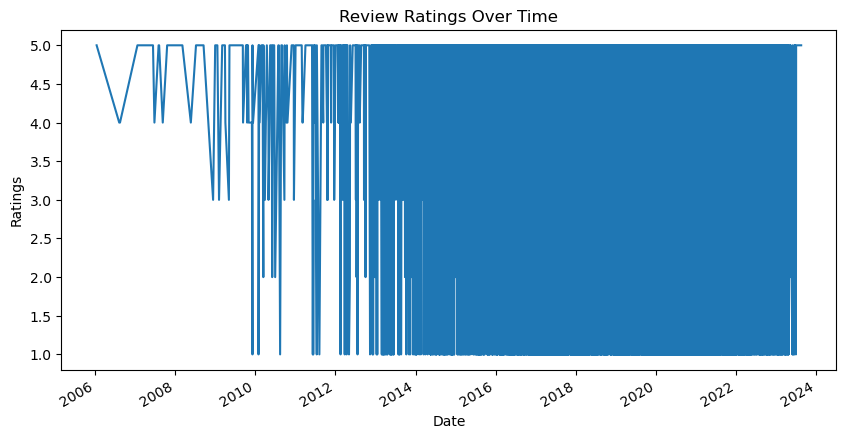

In [12]:
# Convert date to datetime
review_data['date'] = pd.to_datetime(review_data['date'])

# Plotting reviews over time
review_data.set_index('date')['rating'].plot(title='Review Ratings Over Time', figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Ratings')
plt.show()


## Word Count Distribution in Reviews


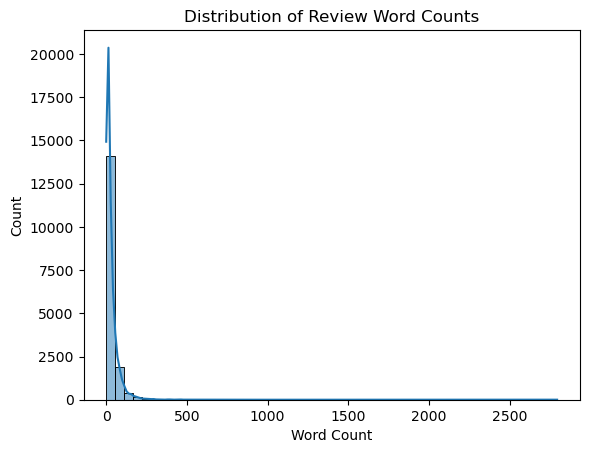

In [13]:
# Calculate word count for reviews
review_data['word_count'] = review_data['text'].apply(lambda x: len(str(x).split()))

# Plotting the distribution of review word counts
sns.histplot(review_data['word_count'], bins=50, kde=True)
plt.title('Distribution of Review Word Counts')
plt.xlabel('Word Count')
plt.show()


## Product Category Analysis

Most Reviewed Categories:
cat1
 'Health Care'                     182042
 'Vitamins                         121690
 'Medical Supplies & Equipment'     89050
 'Diet & Sports Nutrition'          31976
 'Wellness & Relaxation'            28529
Name: title, dtype: int64


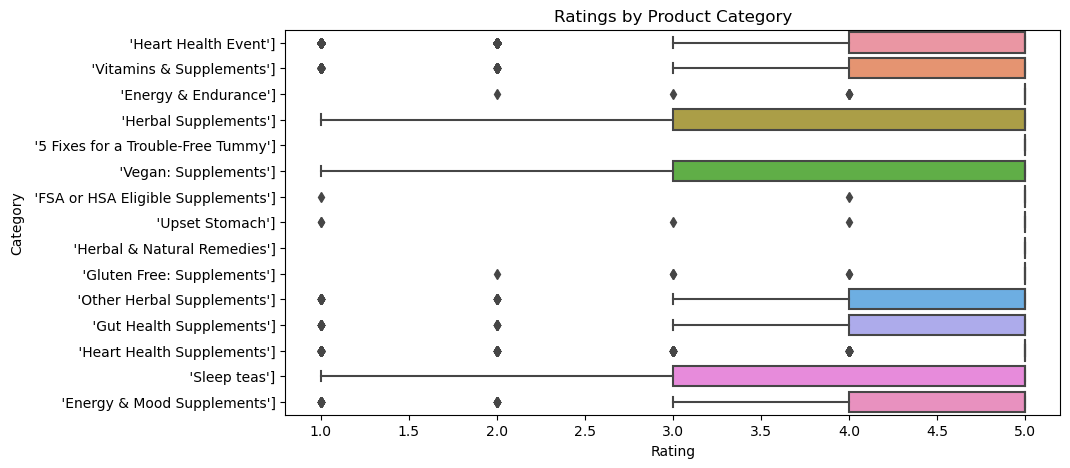

In [14]:
# Analyzing average rating by product category
category_ratings = product_data.groupby('cat1')['title'].count().sort_values(ascending=False)
print("Most Reviewed Categories:")
print(category_ratings.head())

# Visualizing average rating per category
plt.figure(figsize=(10, 5))
sns.boxplot(x='rating', y='cat1', data=pd.merge(review_data, product_data, on='parent_asin'))
plt.title('Ratings by Product Category')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.show()


## Review Helpfulness

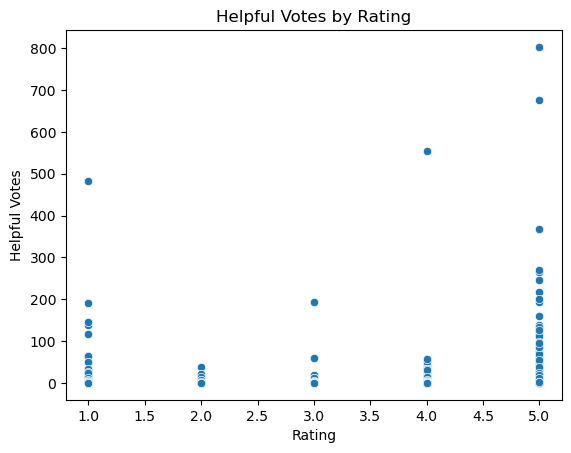

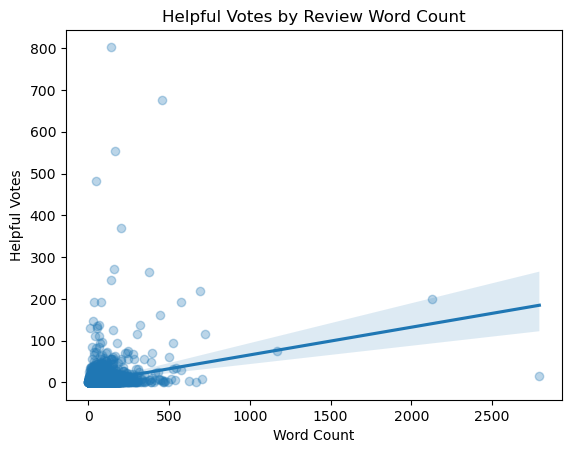

In [15]:
# Scatter plot of helpful votes vs. rating
sns.scatterplot(x='rating', y='helpful_vote', data=review_data)
plt.title('Helpful Votes by Rating')
plt.xlabel('Rating')
plt.ylabel('Helpful Votes')
plt.show()

# Analyzing helpful votes by word count
sns.regplot(x='word_count', y='helpful_vote', data=review_data, scatter_kws={'alpha':0.3})
plt.title('Helpful Votes by Review Word Count')
plt.xlabel('Word Count')
plt.ylabel('Helpful Votes')
plt.show()
